In [1]:
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit.visualization import plot_state_city

from qiskit_ibm_runtime.fake_provider import FakeManilaV2

from qiskit_aer.noise.errors import depolarizing_error
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
from qiskit.quantum_info import Statevector


# Fig 1

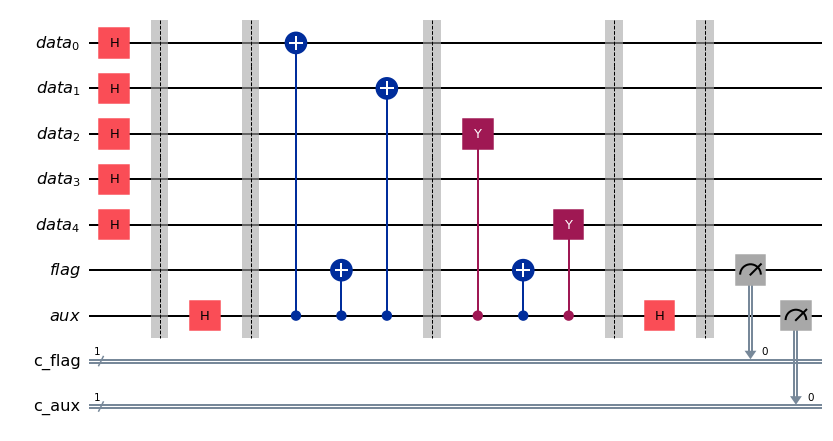

In [29]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   

circuit = QuantumCircuit(data, flag, aux, c_flag, c_aux) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

circuit.measure(flag[0], c_flag[0])
circuit.measure(aux[0], c_aux[0])

circuit.draw('mpl')


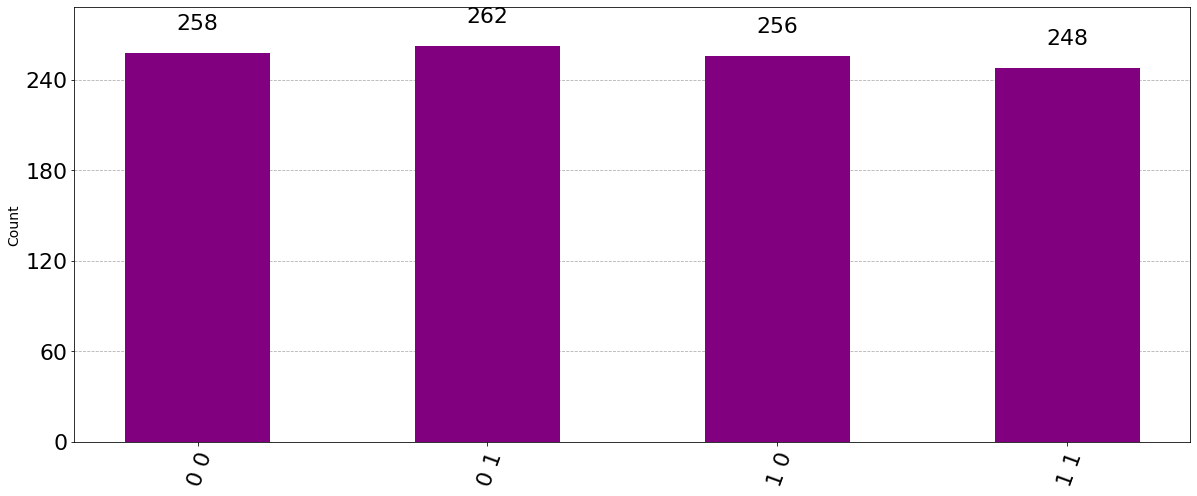

In [30]:
simulator = AerSimulator(noise_model = noise_model)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Without an Error

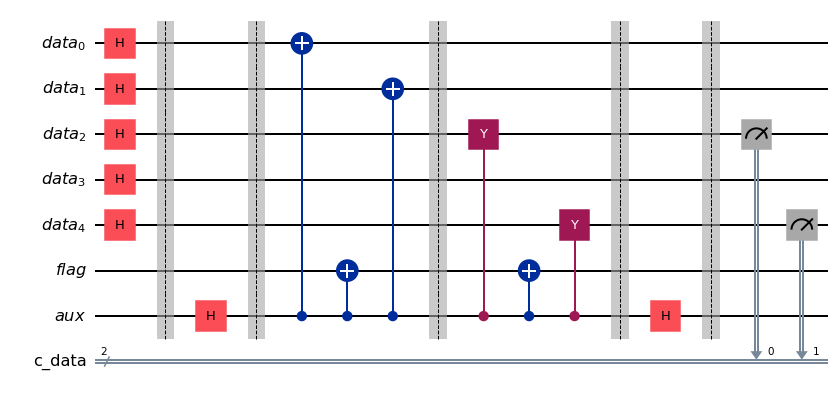

In [31]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, flag, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

circuit.measure(data[2], c_data[0])
circuit.measure(data[4], c_data[1])


circuit.draw('mpl')


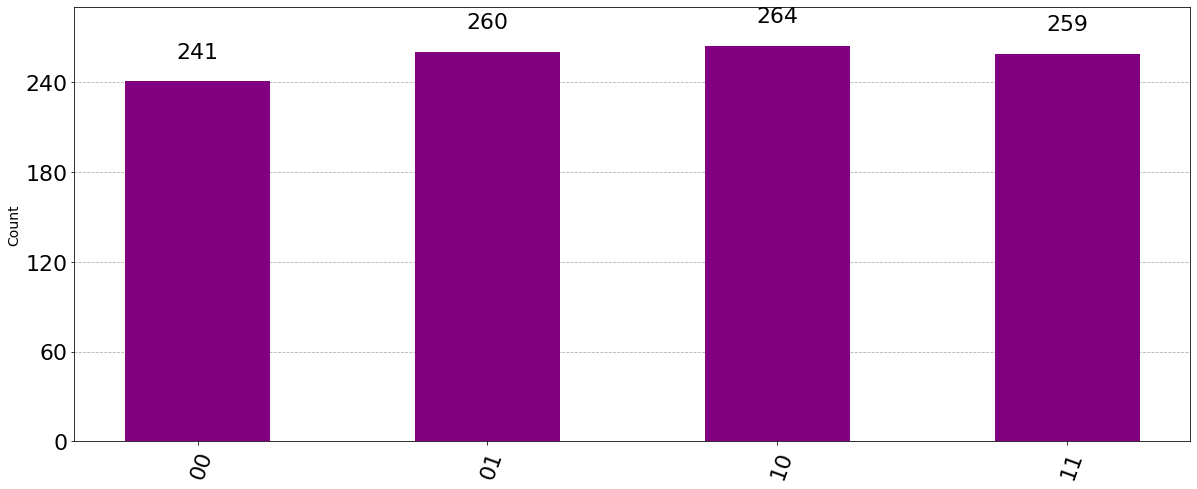

In [32]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Introducing a Pauli Error Does not work rn

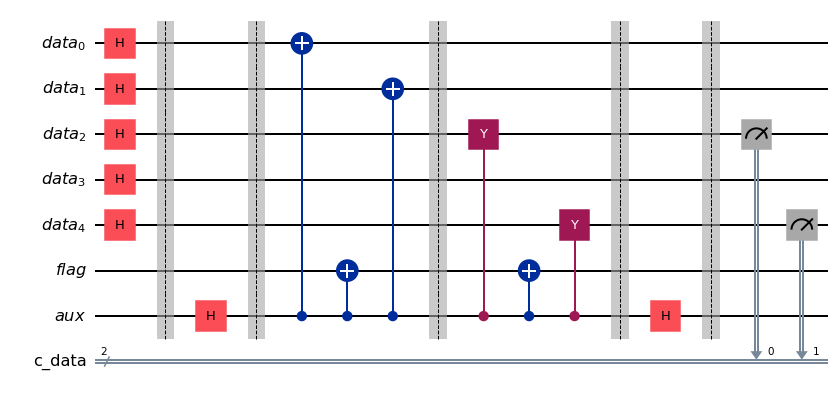

In [121]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, flag, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.y(aux[0])
#circuit.z(aux[0])
#circuit.x(aux[0])
#circuit.z(aux[0])

circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

circuit.measure(data[2], c_data[0])
circuit.measure(data[4], c_data[1])


circuit.draw('mpl')


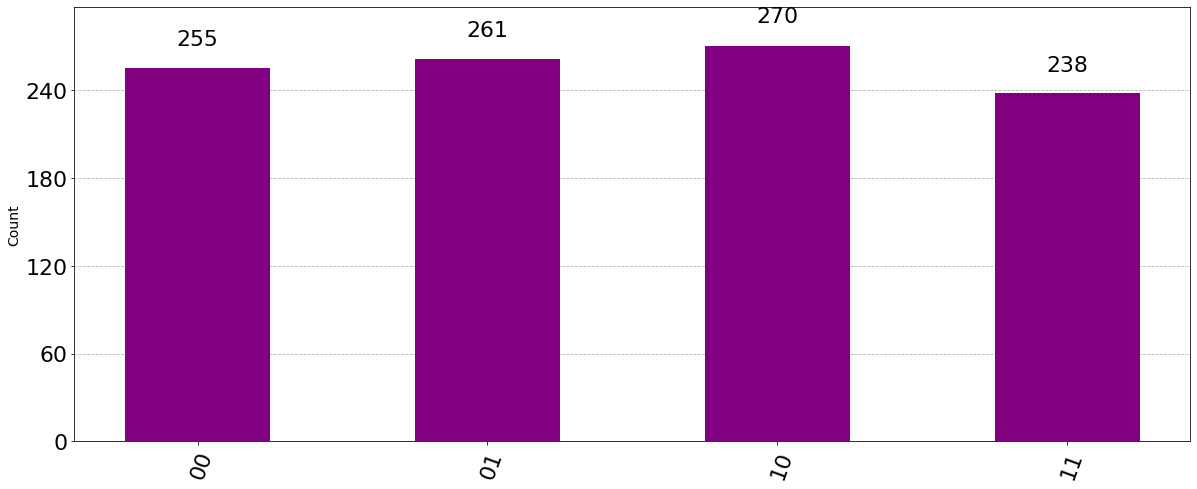

In [122]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Switching to Depolarizing Noise/Random Noise/Magic and Experimenting with Statevectors 

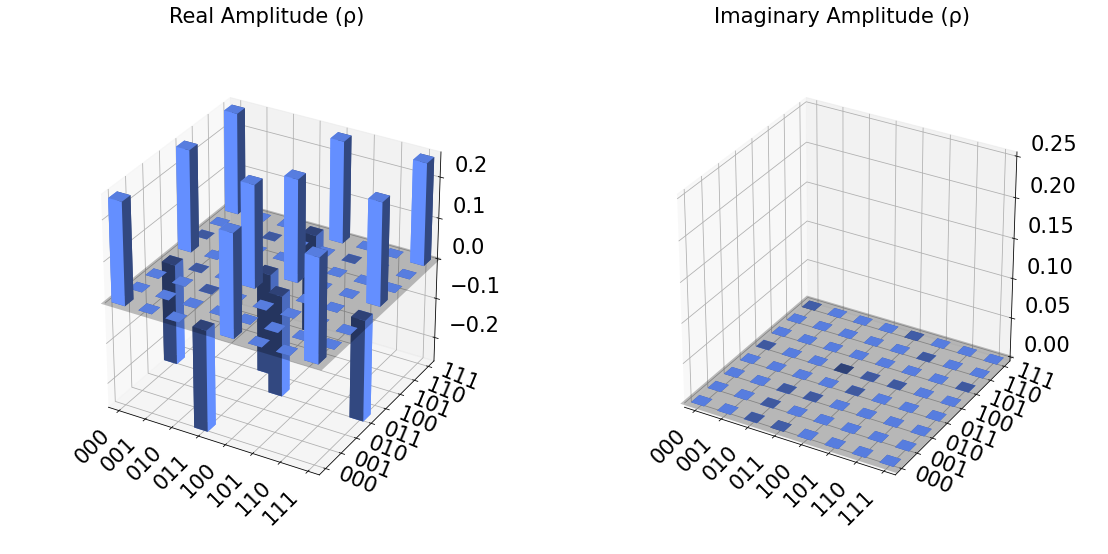

In [26]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

#$circuit.measure(data[0], c_data[0])
#circuit.measure(data[1], c_data[1])


circuit.draw('mpl')


simulator = Aer.get_backend('statevector_simulator')

result = simulator.run(circuit).result()

statevector = result.get_statevector()
plot_state_city(statevector)
#statevector = result.get_statevector()
#plt.show()
#print(statevector)
#statevector.probabilities_dict()

In [16]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        

c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, c_data)  # Order: data, ancilla, and control qubit

# --- Add gates ---
circuit.barrier()
circuit.h(aux[0])  # Apply Hadamard to the auxiliary qubit
circuit.barrier()
circuit.cy(aux[0], data[0])  # Apply controlled-Y gate
circuit.cy(aux[0], data[1])  # Apply controlled-Y gate
circuit.barrier()
circuit.h(aux[0])  # Apply Hadamard to auxiliary qubit
circuit.barrier()

# --- Add depolarizing noise ---
noise_model = NoiseModel()
depolarizing_h = depolarizing_error(1, 1)  # 10% depolarizing error for single-qubit gates
depolarizing_cy = depolarizing_error(1, 2)  # 10% depolarizing error for 2-qubit gates

noise_model.add_all_qubit_quantum_error(depolarizing_h, ['h'])
noise_model.add_all_qubit_quantum_error(depolarizing_cy, ['cy'])

simulator = Aer.get_backend('statevector_simulator')

result = simulator.run(circuit, noise_model=noise_model).result()

statevector = result.get_statevector()
#plt.show()
print(statevector)
statevector.probabilities_dict()

Statevector([ 0. -0.000000e+00j,  0.5-0.000000e+00j,  0.5-6.123234e-17j,
              0. -0.000000e+00j,  0. +0.000000e+00j, -0.5+0.000000e+00j,
              0.5-6.123234e-17j,  0. +0.000000e+00j],
            dims=(2, 2, 2))


{'001': 0.2499999999999999,
 '010': 0.2500000000000001,
 '101': 0.25,
 '110': 0.25}

In [22]:
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'cy', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cy', 'h']
  All-qubits errors: ['h', 'cy']


In [21]:
simulator.qubit_properties(0)

NotImplementedError: 

In [20]:
dir(simulator.qubit_properties(0))

TypeError: qubit_properties() missing 1 required positional argument: 'qubit'

### Going to add a depolarizing noise channel because it is easier

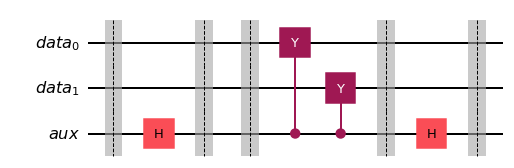

In [2]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

#$circuit.measure(data[0], c_data[0])
#circuit.measure(data[1], c_data[1])


circuit.draw('mpl')


In [6]:

# Initialize fake backend
backend = FakeManilaV2()
properties = backend.properties()

# Get T1 time for qubit 0
t1 = properties.t1(0)
print(f"T1 time for qubit 0: {t1:.2e} seconds")


T1 time for qubit 0: 1.32e-04 seconds


In [11]:
import numpy as np

In [14]:
noise_model = NoiseModel.from_backend(
    backend, thermal_relaxation=True, gate_error=False, readout_error=False
)
backend = AerSimulator.from_backend(backend, noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = backend.qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
print(exp_data.analysis_results(dataframe=True))

NameError: name 'T1' is not defined

In [ ]:
noise_model = NoiseModel.from_backend(
    backend(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)




# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
print(exp_data.analysis_results(dataframe=True))

In [4]:
properties._qubits

{0: {'T1': (0.0001315286444531517,
   datetime.datetime(2024, 5, 27, 4, 30, 14, tzinfo=tzoffset(None, -10800))),
  'T2': (0.00010220390054827382,
   datetime.datetime(2024, 5, 27, 4, 31, 21, tzinfo=tzoffset(None, -10800))),
  'frequency': (4962356469.801912,
   datetime.datetime(2024, 5, 27, 15, 27, 23, tzinfo=tzoffset(None, -10800))),
  'anharmonicity': (-344625413.5384113,
   datetime.datetime(2024, 5, 27, 15, 27, 23, tzinfo=tzoffset(None, -10800))),
  'readout_error': (0.0353,
   datetime.datetime(2024, 5, 27, 4, 29, 32, tzinfo=tzoffset(None, -10800))),
  'prob_meas0_prep1': (0.05479999999999996,
   datetime.datetime(2024, 5, 27, 4, 29, 32, tzinfo=tzoffset(None, -10800))),
  'prob_meas1_prep0': (0.0158,
   datetime.datetime(2024, 5, 27, 4, 29, 32, tzinfo=tzoffset(None, -10800))),
  'readout_length': (5.35111111111111e-06,
   datetime.datetime(2024, 5, 27, 4, 29, 32, tzinfo=tzoffset(None, -10800)))},
 1: {'T1': (0.0001245355048790508,
   datetime.datetime(2024, 5, 27, 4, 30, 14, tzin

In [30]:
provider = IBMProvider()
backend = provider.get_backend('ibmq_belem')  # Replace with your desired backend

# Get backend properties
properties = backend.properties()
t1 = properties.t1(0)
print(f"T1 time for qubit 0: {t1:.2e} seconds")


AccountNotFoundError: 'No default ibm_quantum account saved.'

In [24]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# Load your IBM Quantum account (requires you to have saved your API token first)
provider = IBMProvider()
backend = provider.get_backend('ibmq_belem')  # Replace with your desired backend

# Get backend properties
properties = backend.properties()
t1 = properties.t1(0)
print(f"T1 time for qubit 0: {t1:.2e} seconds")


ModuleNotFoundError: No module named 'qiskit_ibm_provider'

In [20]:
import numpy as np
import qiskit
from qiskit_experiments.library.characterization import Tphi

# An Aer simulator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakePerth

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Time intervals to wait before measurement for t1 and t2
delays_t1 = np.arange(1e-6, 300e-6, 10e-6)
delays_t2 = np.arange(1e-6, 50e-6, 2e-6)

ImportError: cannot import name 'FakeBackendV2' from 'qiskit.providers.fake_provider' (/Users/tanaybhadra/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/fake_provider/__init__.py)

In [21]:
qiskit.providers.fake_provider

<module 'qiskit.providers.fake_provider' from '/Users/tanaybhadra/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/fake_provider/__init__.py'>

In [19]:
qiskit.__qiskit_version__()

AttributeError: module 'qiskit' has no attribute '__qiskit_version__'

In [15]:
import numpy as np
from qiskit_experiments.framework import MeasLevel, ParallelExperiment
from qiskit_experiments.library import T1
from qiskit_experiments.library.characterization.analysis.t1_analysis import T1KerneledAnalysis

# A T1 simulator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakePerth

# A kerneled data simulator
from qiskit_experiments.test.mock_iq_backend import MockIQBackend
from qiskit_experiments.test.mock_iq_helpers import MockIQT1Helper

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
print(exp_data.analysis_results(dataframe=True))

ImportError: cannot import name 'FakeBackendV2' from 'qiskit.providers.fake_provider' (/Users/tanaybhadra/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/fake_provider/__init__.py)

In [33]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

In [11]:
dir(qiskit_ibm_runtime.fake_provider)

['FakeAlgiers',
 'FakeAlmadenV2',
 'FakeArmonkV2',
 'FakeAthensV2',
 'FakeAuckland',
 'FakeBelemV2',
 'FakeBoeblingenV2',
 'FakeBogotaV2',
 'FakeBrisbane',
 'FakeBrooklynV2',
 'FakeBurlingtonV2',
 'FakeCairoV2',
 'FakeCambridgeV2',
 'FakeCasablancaV2',
 'FakeCusco',
 'FakeEssexV2',
 'FakeFractionalBackend',
 'FakeGeneva',
 'FakeGuadalupeV2',
 'FakeHanoiV2',
 'FakeJakartaV2',
 'FakeJohannesburgV2',
 'FakeKawasaki',
 'FakeKolkataV2',
 'FakeKyiv',
 'FakeKyoto',
 'FakeLagosV2',
 'FakeLimaV2',
 'FakeLondonV2',
 'FakeManhattanV2',
 'FakeManilaV2',
 'FakeMelbourneV2',
 'FakeMontrealV2',
 'FakeMumbaiV2',
 'FakeNairobiV2',
 'FakeOsaka',
 'FakeOslo',
 'FakeOurenseV2',
 'FakeParisV2',
 'FakePeekskill',
 'FakePerth',
 'FakePoughkeepsieV2',
 'FakePrague',
 'FakeProviderForBackendV2',
 'FakeQuebec',
 'FakeQuitoV2',
 'FakeRochesterV2',
 'FakeRomeV2',
 'FakeSantiagoV2',
 'FakeSherbrooke',
 'FakeSingaporeV2',
 'FakeSydneyV2',
 'FakeTorino',
 'FakeTorontoV2',
 'FakeValenciaV2',
 'FakeVigoV2',
 'FakeWash

In [9]:
from qiskit_ibm_runtime.fake_provider import FakeBackendV2


ImportError: cannot import name 'FakeBackendV2' from 'qiskit_ibm_runtime.fake_provider' (/Users/tanaybhadra/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/fake_provider/__init__.py)

In [7]:
dir(qiskit_experiments)

NameError: name 'qiskit_experiments' is not defined

In [8]:
import qiskit_experiments

ImportError: cannot import name 'FakeBackendV2' from 'qiskit.providers.fake_provider' (/Users/tanaybhadra/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/fake_provider/__init__.py)

In [ ]:

seed = 100
backend = AerSimulator.from_backend(FakeManilaV2())

delays = np.arange(1.e-6, 300.e-6, 30.e-6)
exp = T1(physical_qubits=(0, ), delays=delays, backend=backend)

t1_data = exp.run().block_for_results()
t1_data.figure(0)




In [188]:
statevector = Statevector(circuit)
print(statevector)
statevector.probabilities_dict()

Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j,
              0. +0.j,  0.5+0.j],
            dims=(2, 2, 2))


{'000': 0.2499999999999999,
 '011': 0.2499999999999999,
 '100': 0.2499999999999999,
 '111': 0.2499999999999999}

### Doing the same thing with counts

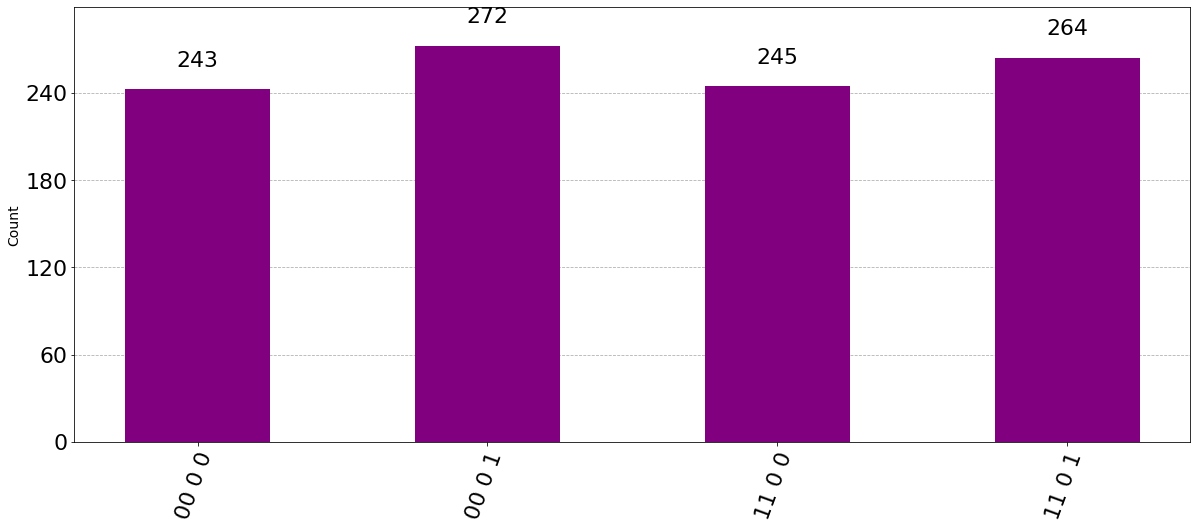

In [25]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

circuit.measure(aux[0], c_aux[0])
circuit.measure(flag[0], c_flag[0])

circuit.measure(data[0], c_data[0])
circuit.measure(data[1], c_data[1])


circuit.draw('mpl')

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')


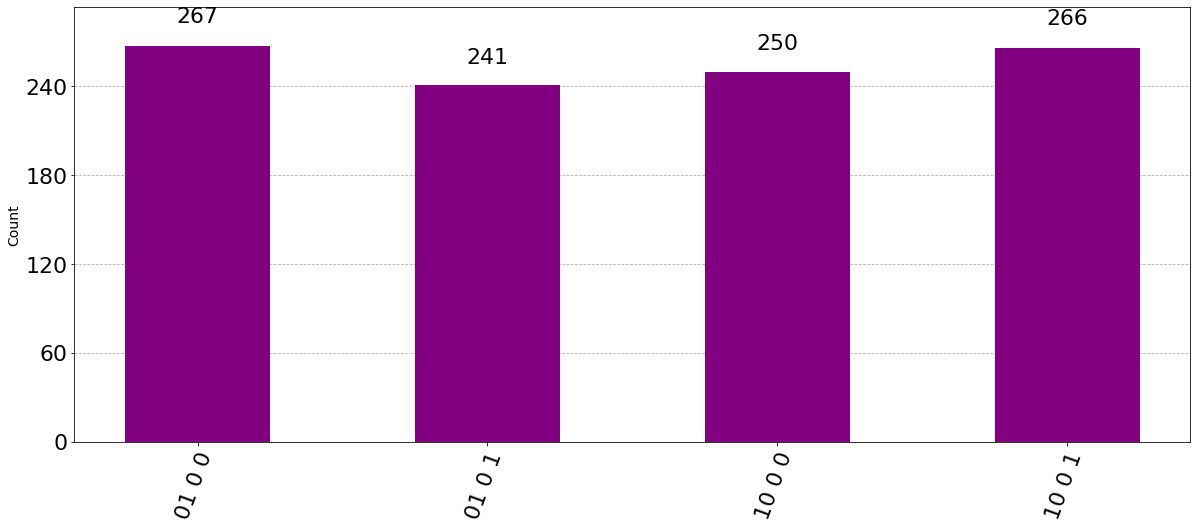

In [27]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, flag, c_aux,c_flag,  c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.x(data[0])
# Define noise model
noise_model = NoiseModel()
# Depolarizing error: prob=0.2, 1-qubit gate


depol_error = depolarizing_error(1, num_qubits=1)
# Add the noise to the identity gate on ancilla (qubit 2 in layout)
noise_model.add_quantum_error(depol_error, ['id'], [0])  # Qubit 2 = aux[0]


circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

circuit.measure(flag[0], c_flag[0])
circuit.measure(aux[0], c_aux[0])

circuit.measure(data[0], c_data[0])
circuit.measure(data[1], c_data[1])


circuit.draw('mpl')

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')




In [233]:
#from qiskit.quantum_info.operators.symplectic import Pauli
#op = Pauli('I')
#statevector.expectation_value(op)

# Fig 2

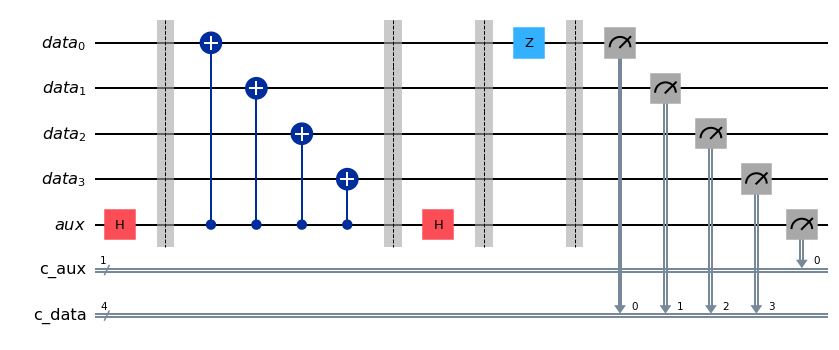

In [27]:
aux = QuantumRegister(1, 'aux')         
#flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(4, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   

c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, c_aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.h(aux[0])

circuit.barrier()

for i in range(4):
    circuit.cx(aux[0], data[i])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()
circuit.z(data[0])
circuit.barrier()

for i in range(4):
    circuit.measure(data[i], c_data[i])

circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


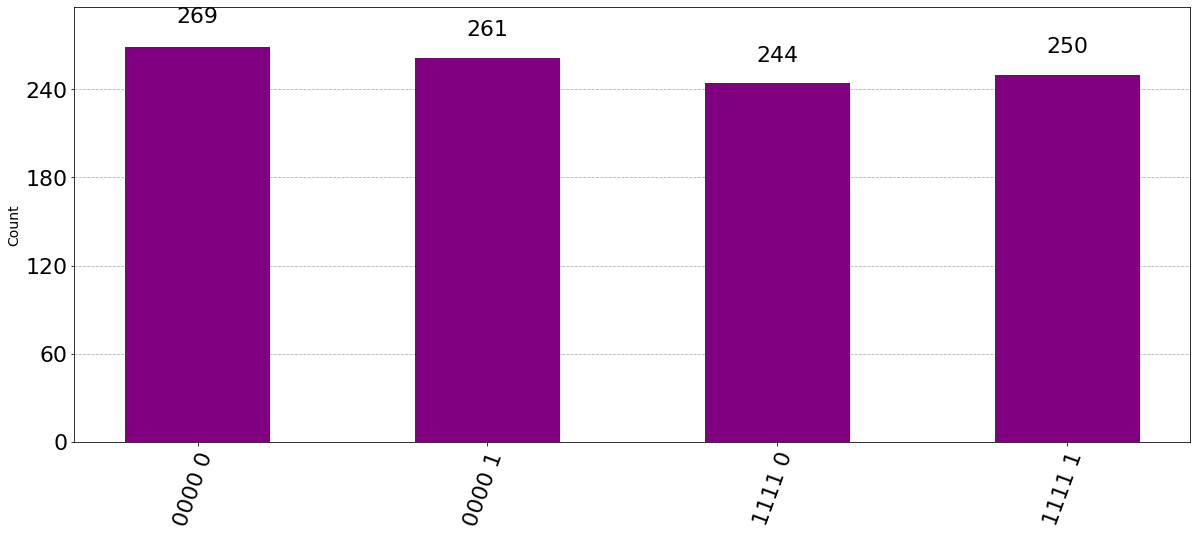

In [28]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

# Fig 3 (Non-FT Preparation)

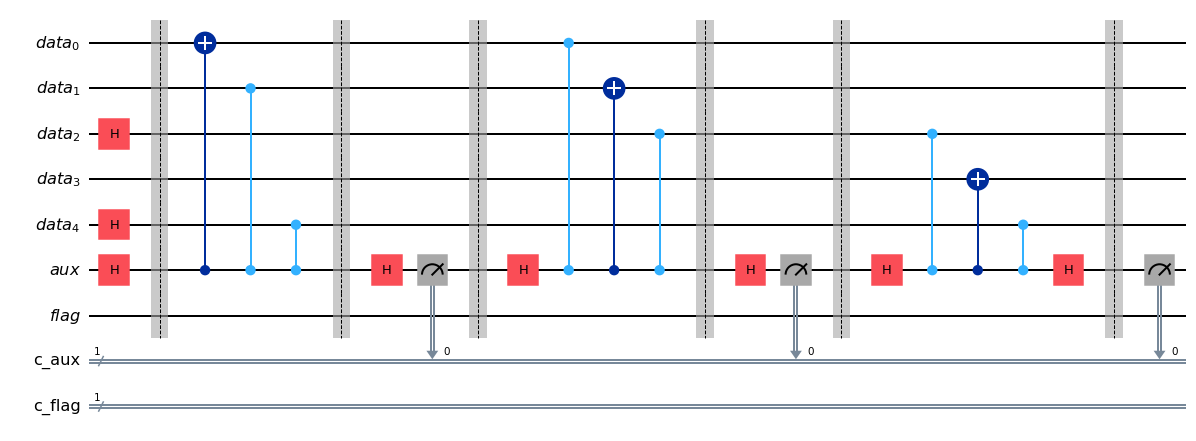

In [33]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        

data = QuantumRegister(5, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   
c_flag = ClassicalRegister(1, 'c_flag')
#c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag) # Order is data, ancilla and control qubit from what I understand 

circuit.h(aux[0])
circuit.h(2) # To put it in the + state
circuit.h(4) # To put it in the + state

circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cz(aux[0], data[1])
circuit.cz(aux[0], data[4])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()

circuit.h(aux[0])
circuit.cz(aux[0], data[0])

circuit.cx(aux[0], data[1])
circuit.cz(aux[0], data[2])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does

circuit.barrier()
circuit.h(aux[0])
circuit.cz(aux[0], data[2])
circuit.cx(aux[0], data[3])
circuit.cz(aux[0], data[4])
circuit.h(aux[0])
circuit.barrier()
circuit.measure(aux[0], c_aux) #not sure what this measurement does




#circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


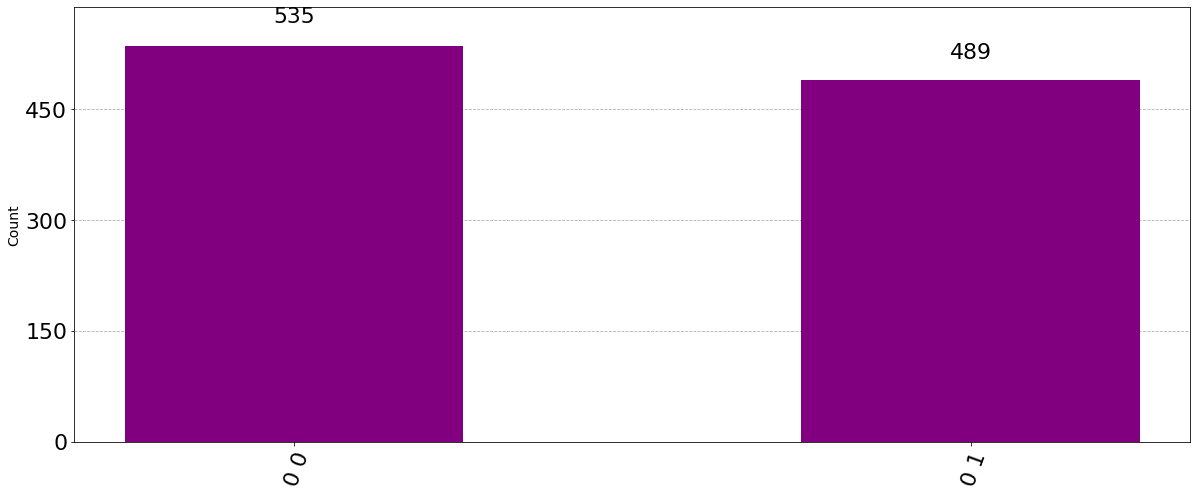

In [34]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

# Fig 3 (FT Preparation)

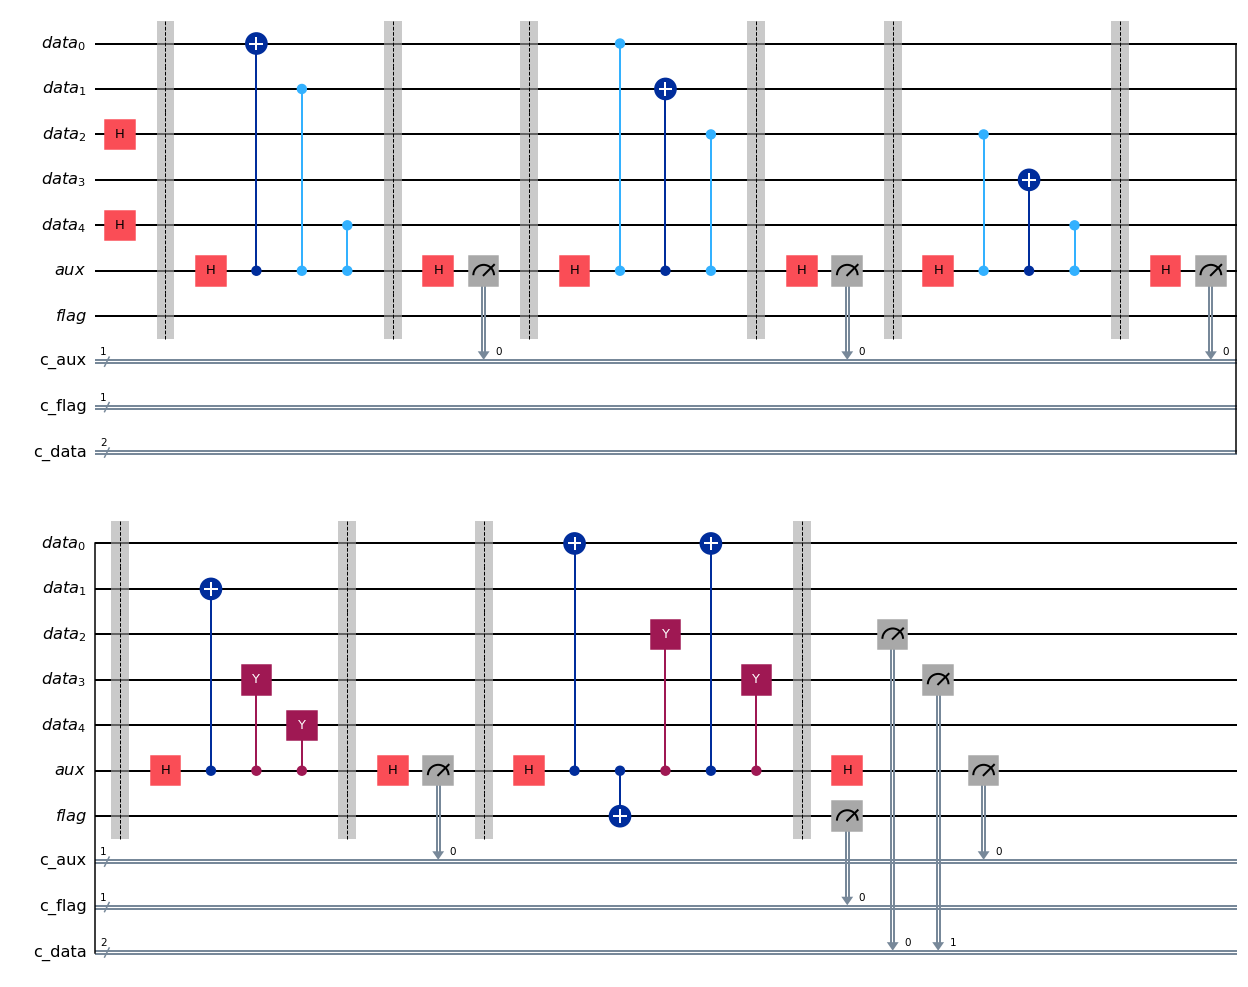

In [2]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        

data = QuantumRegister(5, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   
c_flag = ClassicalRegister(1, 'c_flag')
c_data = ClassicalRegister(2, 'c_data')   

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.h(2) # To put it in the + state
circuit.h(4) # To put it in the + state


circuit.barrier()
circuit.h(aux[0])

circuit.cx(aux[0], data[0])
circuit.cz(aux[0], data[1])
circuit.cz(aux[0], data[4])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()

circuit.h(aux[0])
circuit.cz(aux[0], data[0])

circuit.cx(aux[0], data[1])
circuit.cz(aux[0], data[2])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does

circuit.barrier()
circuit.h(aux[0])
circuit.cz(aux[0], data[2])
circuit.cx(aux[0], data[3])
circuit.cz(aux[0], data[4])
circuit.barrier()

circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[1])
circuit.cy(aux[0], data[3])
circuit.cy(aux[0], data[4])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux)

circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], data[0])
circuit.cy(aux[0], data[3])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux)
circuit.measure(flag[0], c_flag)

circuit.measure(data[2], c_data[0])
circuit.measure(data[3], c_data[1])

#circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


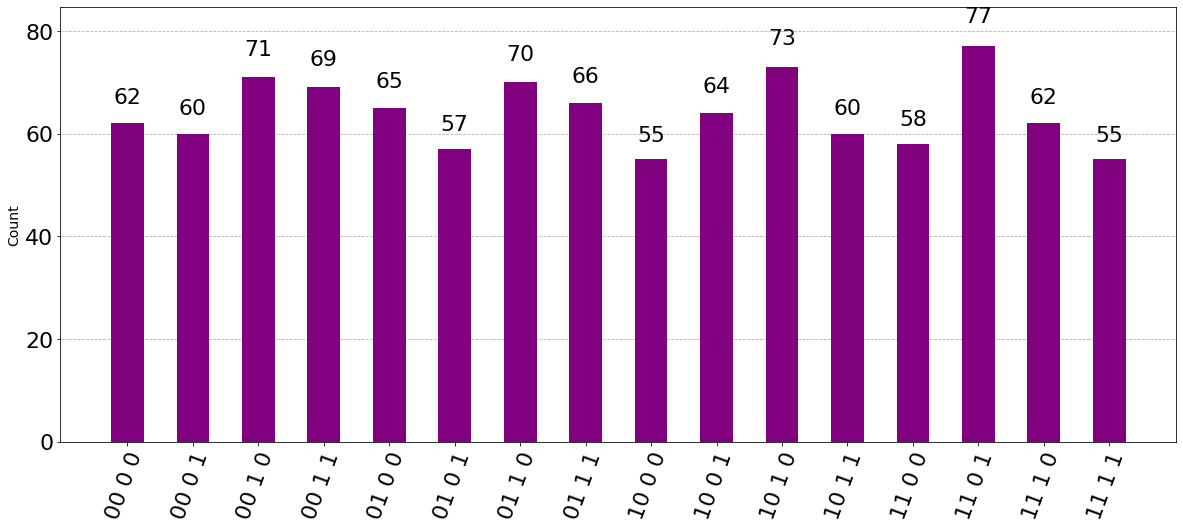

In [3]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

In [7]:
# Define depolarizing error (e.g., 1% error rate on 1-qubit gates, 2% on 2-qubit)
error_1q = depolarizing_error(1, 1)
error_2q = depolarizing_error(1, 2)

# Create noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x', 'y', 'z', 's', 't', 'id'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx', 'cz', 'cy'])

In [8]:
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'cy', 'cz', 'h', 'id', 'rz', 's', 'sx', 't', 'x', 'y', 'z']
  Instructions with noise: ['cx', 't', 's', 'y', 'h', 'cy', 'x', 'cz', 'id', 'z']
  All-qubits errors: ['h', 'x', 'y', 'z', 's', 't', 'id', 'cx', 'cz', 'cy']


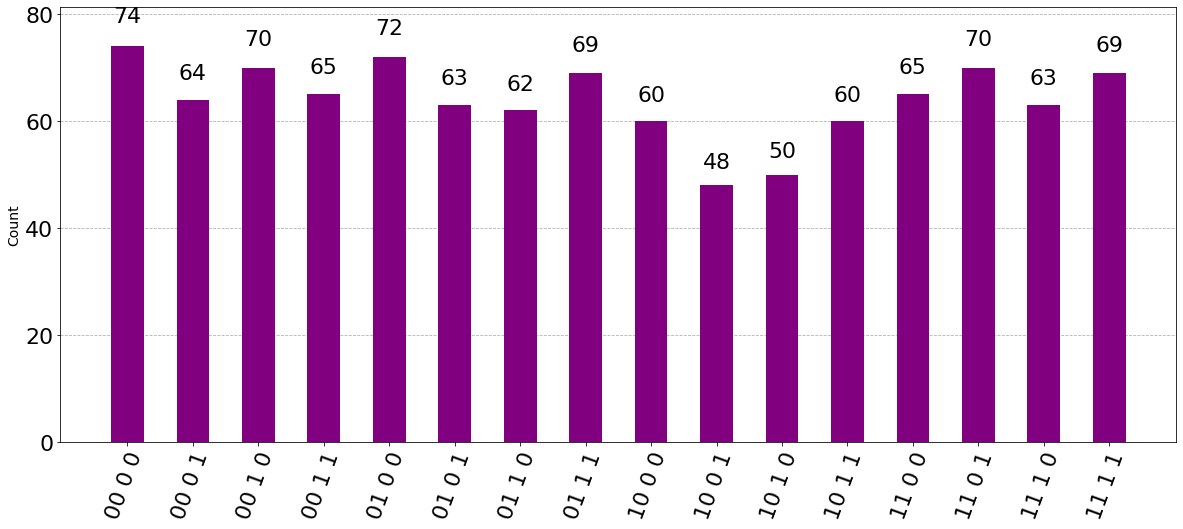

In [9]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

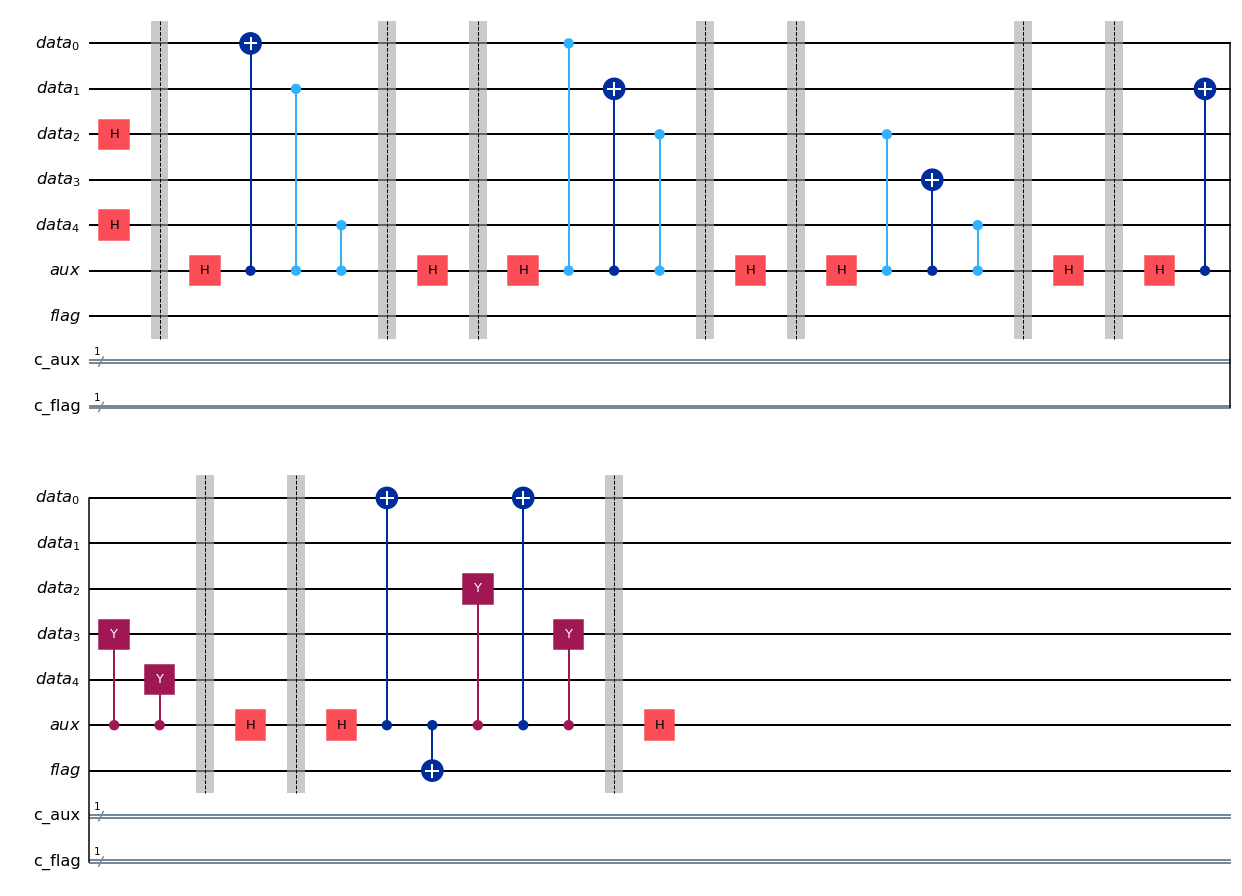

In [3]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        

data = QuantumRegister(5, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   
c_flag = ClassicalRegister(1, 'c_flag')
#c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag) # Order is data, ancilla and control qubit from what I understand 

circuit.h(2) # To put it in the + state
circuit.h(4) # To put it in the + state


circuit.barrier()
circuit.h(aux[0])

circuit.cx(aux[0], data[0])
circuit.cz(aux[0], data[1])
circuit.cz(aux[0], data[4])

circuit.barrier()
circuit.h(aux[0])
#circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()

circuit.h(aux[0])
circuit.cz(aux[0], data[0])

circuit.cx(aux[0], data[1])
circuit.cz(aux[0], data[2])
circuit.barrier()
circuit.h(aux[0])
#circuit.measure(aux[0], c_aux) #not sure what this measurement does

circuit.barrier()
circuit.h(aux[0])
circuit.cz(aux[0], data[2])
circuit.cx(aux[0], data[3])
circuit.cz(aux[0], data[4])
circuit.barrier()

circuit.h(aux[0])
#circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[1])
circuit.cy(aux[0], data[3])
circuit.cy(aux[0], data[4])
circuit.barrier()
circuit.h(aux[0])
#circuit.measure(aux[0], c_aux)

circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], data[0])
circuit.cy(aux[0], data[3])

circuit.barrier()
circuit.h(aux[0])
#circuit.measure(aux[0], c_aux)
#circuit.measure(flag[0], c_flag)


#circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


In [5]:
statevector = Statevector(circuit)
statevector.probabilities_dict()

{'0000000': 0.062499999999999875,
 '0000001': 9.727167034074142e-37,
 '0000010': 2.7748935760024585e-69,
 '0000011': 1.1338816837666766e-35,
 '0000100': 0.062499999999999875,
 '0000101': 9.727167034074142e-37,
 '0000110': 2.7748935760024585e-69,
 '0000111': 1.1338816837666766e-35,
 '0001000': 3.616952570937935e-69,
 '0001001': 7.755001694707366e-104,
 '0001010': 7.506546962724217e-69,
 '0001011': 2.26776336753334e-35,
 '0001100': 3.616952570937935e-69,
 '0001101': 7.755001694707366e-104,
 '0001110': 7.506546962724217e-69,
 '0001111': 2.26776336753334e-35,
 '0010000': 0.062499999999999875,
 '0010001': 9.727167034074142e-37,
 '0010010': 2.7748935760024585e-69,
 '0010011': 1.1338816837666766e-35,
 '0010100': 0.062499999999999875,
 '0010101': 9.727167034074142e-37,
 '0010110': 2.7748935760024585e-69,
 '0010111': 1.1338816837666766e-35,
 '0011000': 3.616952570937935e-69,
 '0011001': 7.755001694707366e-104,
 '0011010': 7.506546962724217e-69,
 '0011011': 2.26776336753334e-35,
 '0011100': 3.61